<a href="https://colab.research.google.com/github/ChethanaVaisali/COVID_19/blob/master/COVID_19_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import numpy as np
trainx = np.load('/gdrive/My Drive/CV Assignment 2/Train_Data/trainx.npy')
trainy = np.load('/gdrive/My Drive/CV Assignment 2/Train_Data/trainy.npy')

print(trainx.shape,trainy.shape)

(2318, 512, 512, 3) (2318,)


In [3]:
unique, counts = np.unique(trainy, return_counts = True)
print(unique, counts)

[0 1 2] [ 170 1072 1076]


In [4]:
### Data Preprocessing
## Find the indices
print(np.unique(trainy[0:170]))
print(np.unique(trainy[170:170 + 1072]))
print(np.unique(trainy[170+1072:170+1072+1076], return_counts=True))

[0]
[1]
(array([2]), array([1076]))


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [6]:
## Divide the data into three sets to facilitate manual augmentation

covid_x = trainx[0:170]
covid_y = trainy[0:170]
normal_x = trainx[170:170+1072]
normal_y = trainy[170:170+1072]
pneumonia_x = trainx[170+1072:170+1072+1076]
pneumonia_y = trainy[170+1072:170+1072+1076]

print(covid_x.shape,covid_y.shape)
print(normal_x.shape,normal_y.shape)
print(pneumonia_x.shape,pneumonia_y.shape)

(170, 512, 512, 3) (170,)
(1072, 512, 512, 3) (1072,)
(1076, 512, 512, 3) (1076,)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range = 90,
                             width_shift_range = [0.2,0.2,0],
                             height_shift_range =[0.2,0.2,0],
                             fill_mode = 'constant',
                             zoom_range=[1,1.10],
                             cval = 0.0)

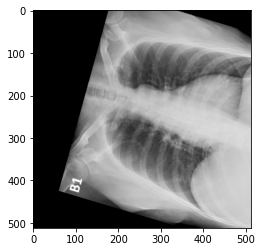

In [8]:
for Xbatch,Ybatch in datagen.flow(covid_x,covid_y,batch_size = 1,shuffle = False):
  plt.imshow(Xbatch[0])
  break

In [12]:
num_images = 0
augmented_covid_x = []
augmented_covid_y = []
# augmented_covid_x = np.array(covid_x)
# augmented_covid_y = np.array(covid_y)
print(len(augmented_covid_x), len(augmented_covid_y))

# augmented_covid_y.append(covid_y)


0 0


In [13]:
for Xbatch,Ybatch in datagen.flow(covid_x,covid_y,batch_size = 64, shuffle = False):
  augmented_covid_x.append(Xbatch)
  augmented_covid_y.append(Ybatch)
  # augmented_covid_x = np.concatenate((augmented_covid_x,Xbatch), axis = 0)
  # augmented_covid_y = np.concatenate((augmented_covid_y,Ybatch), axis = 0)
  num_images += 64
  print(num_images)
  if num_images >= 2600:
    break
augmented_covid_x = np.concatenate(augmented_covid_x, axis = 0)
augmented_covid_y = np.concatenate(augmented_covid_y, axis = 0)
print(augmented_covid_x.shape, augmented_covid_y.shape)
augmented_covid_x = np.concatenate((augmented_covid_x,covid_x), axis = 0)
augmented_covid_y = np.concatenate((augmented_covid_y,covid_y), axis = 0)
print(augmented_covid_x.shape, augmented_covid_y.shape)

64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2048
2112
2176
2240
2304
2368
2432
2496
2560
2624
(2338, 512, 512, 3) (2338,)
(2508, 512, 512, 3) (2508,)


In [0]:
norpneu_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45
)

In [0]:
num_images = 0
augmented_normal_x = []
augmented_normal_y = []

for Xbatch,Ybatch in norpneu_generator.flow(normal_x,normal_y,batch_size = 64, shuffle = False):
  augmented_normal_x.append(Xbatch)
  augmented_normal_y.append(Ybatch)
  num_images += 64
  # print(num_images)
  if num_images >= 2600:
    break
augmented_normal_x = np.concatenate(augmented_covid_x, axis = 0)
augmented_covid_y = np.concatenate(augmented_covid_y, axis = 0)
print(augmented_covid_x.shape, augmented_covid_y.shape)
augmented_covid_x = np.concatenate((augmented_covid_x,covid_x), axis = 0)
augmented_covid_y = np.concatenate((augmented_covid_y,covid_y), axis = 0)
print(augmented_covid_x.shape, augmented_covid_y.shape)


In [0]:
def augmented_images(X,Y, generator , batch_size, estimated_size,shuffle = False):
  num_images = 0
  augmented_x = []
  augmented_y = []

  for Xbatch,Ybatch in generator.flow(X,Y,batch_size = batch_size, shuffle = shuffle):
    augmented_x.append(Xbatch)
    augmented_y.append(Ybatch)
    num_images += batch_size
    # print(num_images)
    if num_images >= estimated_size:
      break
  augmented_x = np.concatenate(augmented_x,axis = 0)
  augmented_y = np.concatenate(augmented_y,axis = 0)

  augmented_x = np.concatenate((augmented_x,X), axis= 0)
  augmented_y = np.concatenate((augmented_y,Y), axis = 0)

  return augmented_x,augmented_y

In [0]:
augmented_covid_x, augmented_covid_y = augmented_images(covid_x,covid_y, datagen, 64, 2500)
print(augmented_covid_x.shape, augmented_covid_y.shape)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_covid_x.npy', augmented_covid_x)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_covid_y.npy', augmented_covid_y)
del augmented_covid_x
del augmented_covid_y

In [0]:
augmented_normal_x, augmented_normal_y = augmented_images(normal_x, normal_y,norpneu_generator, 64, 1800,False)
print(augmented_normal_x.shape, augmented_normal_y.shape)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_normal_x.npy', augmented_normal_x)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_normal_y.npy', augmented_normal_y)
del augmented_normal_x
del augmented_normal_y

In [0]:
augmented_pneumonia_x, augmented_pneumonia_y = augmented_images(pneumonia_x,penumonia_y, norpneu_generator, 64, 1800, False)
print(augmented_pneumonia_x.shape)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_pneumonia_x.npy', augmented_pneumonia_x)
np.save('/gdrive/My Drive/CV Assignment 2/Augmented_data/augmented_pneumonia_y.npy', augmented_pneumonia_y)
del augmented_pneumonia_x
del augmented_pneumonia_y